In [46]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.animation as animation

import imageio

import datetime


In [47]:
# C:\Users\cruze\Documents\GitHub\covid19\csse_covid_19_data\csse_covid_19_time_series

# confirmed_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_US.csv')
confirmed_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
confDF = pd.read_csv(confirmed_URL)

# global_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_global.csv')
global_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
globalDF = pd.read_csv(global_URL)

# death_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_deaths_US.csv')
deathsUS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
deathDF = pd.read_csv(deathsUS_URL)

deathsGlobal_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deathGlobalDF = pd.read_csv(deathsGlobal_URL)
# dateDict = dict(zip(confDF.columns[11:], pd.to_datetime(confDF.columns[11:])))
# confDF = confDF.rename(dateDict, axis='columns')

In [48]:
byStateDF = confDF.groupby('Province_State').sum()

states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

byStateDF = byStateDF.loc[states]

deathStateDF = deathDF.groupby('Province_State').sum()

deathStateDF = deathStateDF.loc[states]

In [49]:
# byStateDF[byStateDF < 1] = 1

dfData = byStateDF.iloc[:, 5:]

#add South Korea and Italy
temp = globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,5:]
temp = temp.append(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,5:])
temp = temp.append(globalDF[globalDF.index==223].iloc[:,5:])
temp = temp.rename(index={143 : 'South Korea', 137 : 'Italy', 223 : 'United Kingdom'})
dfData = dfData.append(temp)


dfLabels = byStateDF.iloc[:, :5]
labels = dfLabels.index.tolist()
labels.append('South Korea')
labels.append('Italy')
labels.append('United Kingdom')

dfDiff = dfData.diff(axis=1).iloc[:,1:]
dfData = dfData.iloc[:,1:]

dfDiff = dfDiff.transpose().rolling(window=3).mean().transpose()

plt_path = os.path.join(os.getcwd(), 'plots')

dfData[dfData < 1] = 1
dfDiff[dfDiff < 1] = 1

# dfDiff.to_csv('diff.csv')
# dfData.to_csv('state.csv')

In [50]:

for j in range(0,int(len(dfData.columns))):

    plotname = 'plot' + str(j).zfill(4) + '.png'
    plot_path = os.path.join(os.getcwd(), 'plots', plotname)
    

    plt.figure(figsize=(22, 10))
    plt.plot(dfData.iloc[:,:j].transpose(), dfDiff.iloc[:,:j].transpose(), alpha=0.2)

    for i, lab in enumerate(labels):
        x = dfData.iloc[i,j-1]
        y = dfDiff.iloc[i,j-1]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x+0.5, y+0.5, lab, fontsize=11)

    plt.title('Confirmed Cases on ' + dfData.iloc[:,j].name + ' vs. Total Cases ')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Total Cases')
    plt.ylabel('New Daily Cases')
    plt.xlim(1, 1000000)
    plt.ylim(1, 100000)
    plt.xticks(rotation='vertical')

    plt.savefig(plot_path)
    plt.clf()
    plt.close()
    # plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [51]:

img_path = os.path.join(os.getcwd(), 'plots')
filenames = os.listdir(img_path)
save_path = os.path.join(os.getcwd(), 'animated.gif')

print('reading files...')

d = "plots"
filenames = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        filenames.append(full_path)

print('saving gif...')

filenames = filenames[-30:]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(save_path, images, duration=1)

reading files...
saving gif...


------------------------------------------------------------------------

below this line in progress

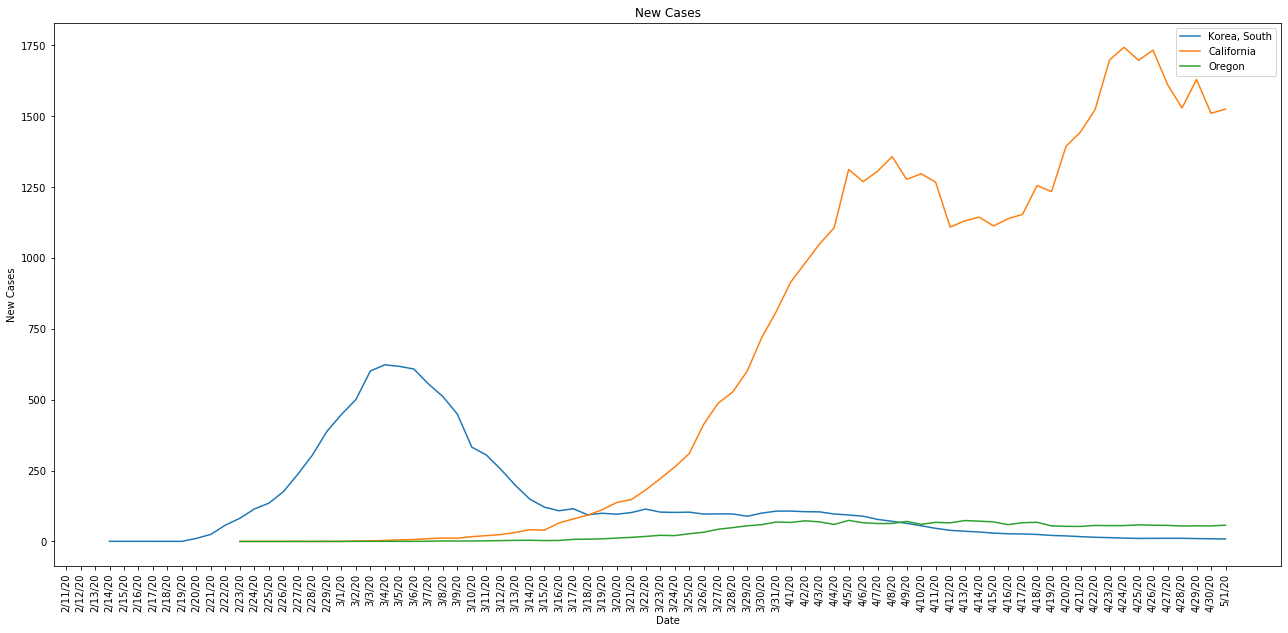

In [52]:

plt.figure(figsize=(22, 10))

# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())

plt.plot(globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Korea, South')
# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')


plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='California')
# plt.plot(byStateDF[byStateDF.index=='New York'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New York')
# plt.plot(byStateDF[byStateDF.index=='New Jersey'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New Jersey')
plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Oregon')
# plt.plot(byStateDF[byStateDF.index=='Florida'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Florida')
# plt.plot(byStateDF[byStateDF.index=='Georgia'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Georgia')
# plt.plot(byStateDF[byStateDF.index=='South Carolina'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='South Carolina')
# plt.plot(byStateDF[byStateDF.index=='Louisiana'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Louisiana')
# plt.plot(byStateDF[byStateDF.index=='Michigan'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Michigan')
# plt.plot(byStateDF[byStateDF.index=='Texas'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Texas')
# plt.plot(byStateDF[byStateDF.index=='Massachusetts'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Massachusetts')
# plt.plot(byStateDF[byStateDF.index=='Illinois'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Illinois')
# plt.plot(byStateDF[byStateDF.index=='Washington'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Washington')

# plt.plot(globalDF[globalDF.index==223].iloc[:,10:].transpose().diff().rolling(window=7).mean(), label='UK')

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title('New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('New Cases')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
plt.legend(loc='best')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()


In [53]:
deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Italy'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]



# deathStateDF[deathStateDF.index=='New York'].iloc[:,-1] / byStateDF[byStateDF.index=='New York'].iloc[:,-1]


deathGlobalDF[deathGlobalDF['Country/Region']=='Philippines'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Philippines'].iloc[:,-1]

182    0.066005
Name: 5/1/20, dtype: float64

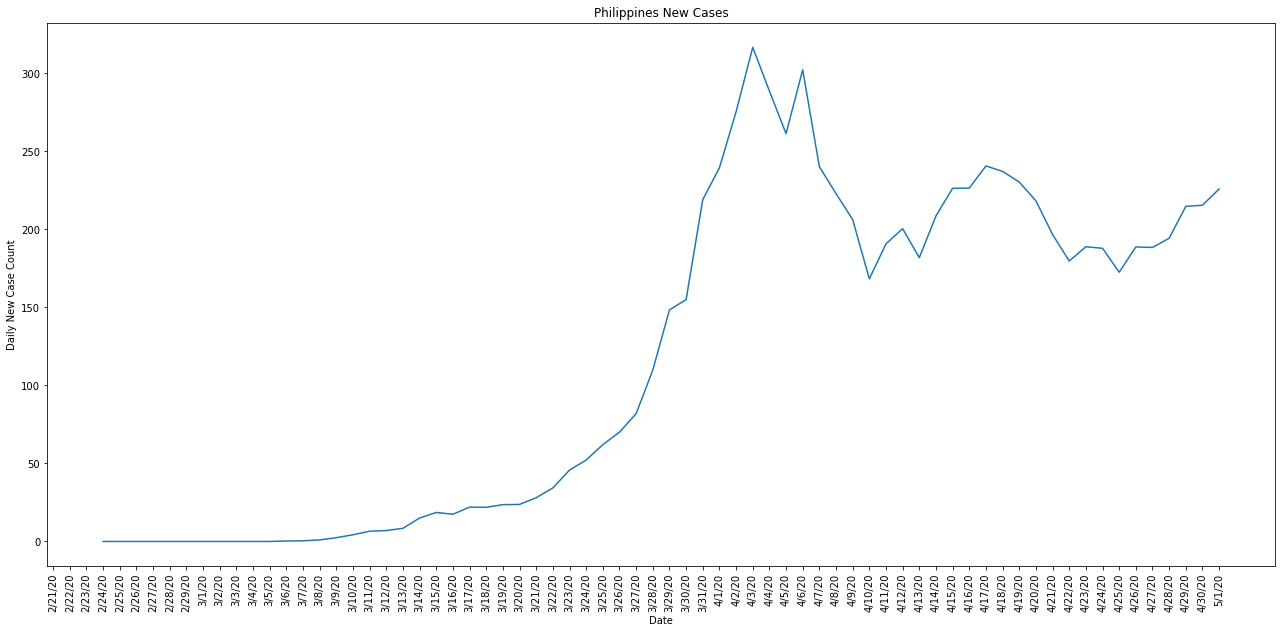

In [54]:
country = 'Philippines'

plt.figure(figsize=(22, 10))

# plt.plot(deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean())
plt.plot(globalDF[globalDF['Country/Region']==country].iloc[:,30:].transpose().diff().rolling(window=7).mean())

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title(country + ' New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
# plt.legend(loc='left')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()

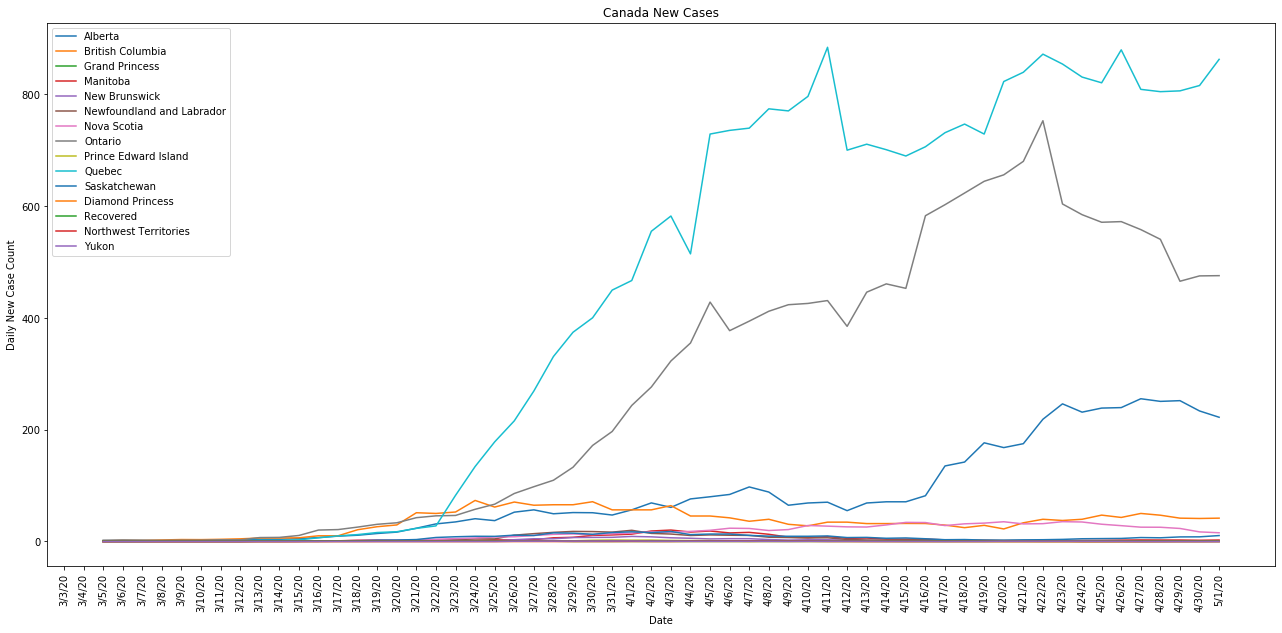

In [55]:
country = 'Canada'

plt.figure(figsize=(22, 10))

plt.plot(globalDF[globalDF['Country/Region']==country].iloc[:,40:].transpose().diff().rolling(window=7).mean())

labels = globalDF[globalDF['Country/Region']==country]['Province/State'].to_list()

plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(country + ' New Cases')

plt.xlabel('Date')
plt.ylabel('Daily New Case Count')

plt.show()



In [56]:
confDF[confDF['Province_State']=='California'].sort_values(by=confDF.columns[-1], ascending=False).iloc[:20,:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
209,84006037.0,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,16447,17537,18545,19133,19567,20423,20996,22485,23220,24262
223,84006065.0,US,USA,840,6065.0,Riverside,California,US,33.743150,-115.993358,...,2960,3218,3315,3315,3563,3643,3735,3942,4031,4079
227,84006073.0,US,USA,840,6073.0,San Diego,California,US,33.034846,-116.736533,...,2491,2643,2826,2943,2943,3043,3141,3432,3432,3564
220,84006059.0,US,USA,840,6059.0,Orange,California,US,33.701475,-117.764600,...,1753,1827,1845,1969,2074,2126,2151,2252,2393,2537
233,84006085.0,US,USA,840,6085.0,Santa Clara,California,US,37.231049,-121.697046,...,1962,1987,2018,2040,2084,2105,2122,2134,2163,2179
226,84006071.0,US,USA,840,6071.0,San Bernardino,California,US,34.840603,-116.177469,...,1489,1608,1666,1666,1732,1772,1827,1928,2058,2113
191,84006001.0,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,1242,1352,1403,1439,1470,1500,1533,1568,1603,1636
228,84006075.0,US,USA,840,6075.0,San Francisco,California,US,37.752151,-122.438567,...,1233,1302,1340,1354,1408,1424,1468,1490,1499,1523
231,84006081.0,US,USA,840,6081.0,San Mateo,California,US,37.422881,-122.327555,...,958,966,989,1019,1019,1080,1099,1136,1177,1197
224,84006067.0,US,USA,840,6067.0,Sacramento,California,US,38.451068,-121.342537,...,971,987,1019,1019,1037,1045,1053,1068,1077,1090


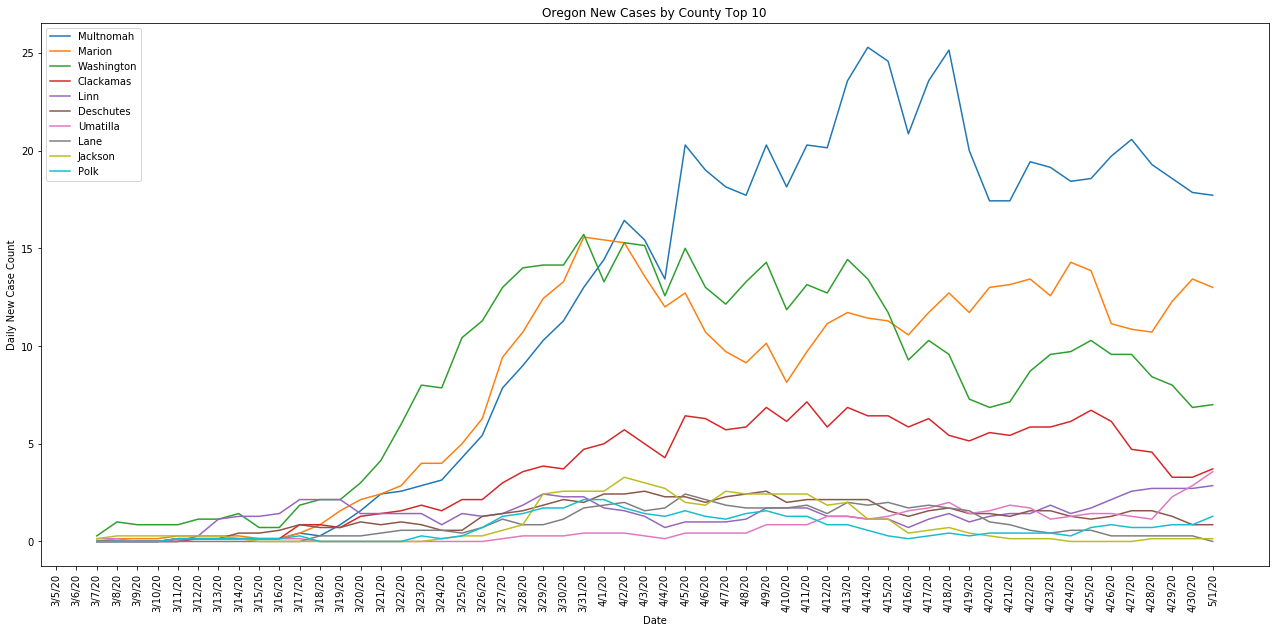

In [57]:
state = 'Oregon'

counties = confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).Admin2.tolist()
dates = confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).iloc[:,20:].columns.tolist()
labels = counties

data = pd.DataFrame(np.array(confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).iloc[:,20:]), index=counties, columns=dates).transpose()

plt.figure(figsize=(22, 10))
plt.plot(data.diff().iloc[30:,:10].rolling(window=7).mean())
plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(state + ' New Cases by County Top 10')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')

plt.show()



In [58]:
# byStateDF[byStateDF.index=='New York']

stateDeathDF = deathDF.groupby('Province_State').sum()

stateDeathDF[stateDeathDF.index=='Oregon']

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Oregon,3.193647e+09,31920,1647378.0,1601.726424,-4373.169106,4217737,0,0,0,0,...,78,83,86,87,92,92,99,101,103,104
